# Carga de librerías


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Carga de datos

In [2]:
archivo = "SI.txt"

df = pd.read_csv(archivo, sep=" ", header=None, names=["a", "b", "c"])
Elem = df["a"][0]
Attr = df["a"][1]
NumClas = df["a"][2]
print("Número de Elementos: ")
print(Elem)
print("Número de Atributos: ")
print(Attr)
print("Número de Clases: ")
print(NumClas)


Número de Elementos: 
420
Número de Atributos: 
19
Número de Clases: 
7


In [3]:
df2 = pd.read_table(archivo, header = None, sep = ",",skiprows = 3)
df2

#Saltar los renglones
#cd = pd.read_csv(archivo,skiprows = lambda x: x<3, names = columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,140,125,0,0.0,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,225,58,0,0.0,0.000000,0.333334,0.421637,0.444444,0.344265,8.333333,5.555555,14.111111,5.333334,-8.333333,17.333334,-9.000000,14.111111,0.622222,-2.068564,6
416,170,154,0,0.0,0.000000,0.111111,0.172133,0.055556,0.136083,0.074074,0.000000,0.222222,0.000000,-0.222222,0.444444,-0.222222,0.222222,0.222222,-2.094395,6
417,238,61,0,0.0,0.000000,0.666667,0.471405,0.722222,0.490653,8.777778,5.888889,14.333333,6.111111,-8.666667,16.666666,-8.000000,14.333333,0.588823,-2.121837,6
418,189,62,0,0.0,0.000000,0.388889,0.250924,0.444444,0.344265,7.629630,5.000000,13.111111,4.777778,-7.888889,16.444445,-8.555555,13.111111,0.635938,-2.066953,6


In [4]:
numAttri = len(df2.columns) #o =Attr
print("Número de Atributos:")
numAttri1 = numAttri-1
print(numAttri1)
numclas = NumClas

Número de Atributos:
19


In [5]:
# la sub-matriz X contiene los datos de las primeras X columnas del dataframe y todas las filas
X2 = df2.iloc[:, 0:numAttri1].values

# El vector y contiene los valores de las X columnas (Grupos de datos)para todas las filas
y2 = df2.iloc[:, numAttri1].values

In [ ]:
df2.hist()

plt.show()

# Análisis de Datos

In [7]:
print("Información del Conjunto de Datos")
print(df2.info())

Información del Conjunto de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       420 non-null    int64  
 1   1       420 non-null    int64  
 2   2       420 non-null    int64  
 3   3       420 non-null    float64
 4   4       420 non-null    float64
 5   5       420 non-null    float64
 6   6       420 non-null    float64
 7   7       420 non-null    float64
 8   8       420 non-null    float64
 9   9       420 non-null    float64
 10  10      420 non-null    float64
 11  11      420 non-null    float64
 12  12      420 non-null    float64
 13  13      420 non-null    float64
 14  14      420 non-null    float64
 15  15      420 non-null    float64
 16  16      420 non-null    float64
 17  17      420 non-null    float64
 18  18      420 non-null    float64
 19  19      420 non-null    int64  
dtypes: float64(16), int64(4)
memory usage: 65.

In [8]:
print("Descripción del Conjunto de Datos:")
print(df2.describe())

Descripción del Conjunto de Datos:
               0           1      2           3           4           5   \
count  420.000000  420.000000  420.0  420.000000  420.000000  420.000000   
mean   144.245238  142.345238    0.0    0.011905    0.005820    1.756878   
std     73.219449   60.798955    0.0    0.035253    0.029154    2.381124   
min      1.000000   11.000000    0.0    0.000000    0.000000    0.000000   
25%     85.000000   92.500000    0.0    0.000000    0.000000    0.666668   
50%    160.000000  152.000000    0.0    0.000000    0.000000    1.333334   
75%    205.000000  190.000000    0.0    0.000000    0.000000    2.166667   
max    253.000000  251.000000    0.0    0.222222    0.222222   25.500000   

               6           7            8           9           10  \
count  420.000000  420.000000   420.000000  420.000000  420.000000   
mean     3.465178    2.357937     6.538579   30.833069   27.335979   
std     30.810966    3.651203    68.978325   31.442611   28.866983   


In [9]:
#Número de Atributos
numAttri=len(df2.columns)

In [10]:
print("Distribución de atributos:")
print(df2.groupby(df2.iloc[:, numAttri1].values).size())

Distribución de atributos:
0     30
1     30
2     30
3     78
4    119
5     30
6    103
dtype: int64


# División de la matriz del Conjunto de Datos en 2 partes


In [11]:
# la sub-matriz X contiene los datos de las primeras NumAtri-1 columnas del dataframe y todas las filas
X1 = df2.iloc[:, 0:numAttri1].values

# El vector y contiene los valores de las NumAtri-1 columnas (Grupos de datos)para todas las filas
y1 = df2.iloc[:, numAttri1].values

# Datos en las matrices


In [12]:
print("Conjunto de elementos")
print(X1)

print("\nClases")
print(y1)

Conjunto de elementos
[[140.         125.           0.         ...   7.7777777    0.5456349
   -1.1218182 ]
 [188.         133.           0.         ...   8.444445     0.53858024
   -0.92481726]
 [105.         139.           0.         ...   7.5555553    0.5326279
   -0.96594584]
 ...
 [238.          61.           0.         ...  14.333333     0.5888227
   -2.1218371 ]
 [189.          62.           0.         ...  13.111111     0.6359381
   -2.0669532 ]
 [242.          57.           0.         ...  20.88889      0.46630767
   -2.3706133 ]]

Clases
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

# Normalización


In [13]:
#Apliqué una transformación de los datos para poder aplicar la distribución normal
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X1)

# Cálculo de autovectores y autovalores.

In [14]:
# Calculé la matriz de covarianza
print("NumPy Matriz de covarianza: \n%s"
      %np.cov(X_std.T))

NumPy Matriz de covarianza: 
[[ 1.00238663 -0.00517655  0.         -0.09000882 -0.00527915 -0.07761408
  -0.08324898 -0.10555245 -0.06898446 -0.04813542 -0.05291044 -0.02840126
  -0.06719666 -0.00450509  0.07792637 -0.11326005 -0.04189296 -0.09883005
  -0.12819719]
 [-0.00517655  1.00238663  0.          0.23891706  0.01220751  0.04390118
  -0.05785436  0.08021026 -0.04556318 -0.20818285 -0.20693508 -0.22851966
  -0.18107766  0.18597578 -0.29217723  0.29756008 -0.19260387 -0.0982089
   0.52182882]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.09000882  0.23891706  0.          1.00238663  0.04721002  0.00632074
  -0.02091117  0.01652921 -0.02277823  0.03103135  0.03174881  0.01749016
   0.04665142 -0.0192451  -0.05511378  0.09696486  0.03424307 -0.02753345
   0.19669682]
 [-0.00527915  0.01220751  0.          0.0472100

In [15]:
# Valor propio y Vector Propio de la matriz
covMat = np.cov(X_std.T)

propiVal, propiVec = np.linalg.eig(covMat)

In [16]:
print("Vectores propios \n%s" %propiVec)

print("\nValores propios \n%s" %propiVal)

Vectores propios 
[[-1.50400773e-03  8.18822224e-02  1.86509609e-01  5.87474198e-01
   4.86280456e-01  2.08417501e-01  5.46599353e-01  8.43500430e-02
   1.03777771e-01  6.40966938e-02 -1.03521101e-01 -4.07341826e-02
   1.82988662e-02  1.74644110e-05 -6.41882416e-10  3.33040599e-09
   2.20850876e-09  1.44346353e-09  0.00000000e+00]
 [-1.05147984e-01 -4.99508107e-02 -4.35383517e-01  4.03841947e-01
  -2.87511415e-02  3.57361708e-02 -2.51567012e-01  5.20517946e-01
  -4.85477385e-01 -7.60705598e-02 -1.13826656e-01  2.07097414e-01
  -3.71250333e-03  1.17663412e-02  1.87255135e-09 -8.77639261e-09
   4.08456005e-09  2.60937279e-10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-6.11001000e-03 -8.25849576e-03 -3.

In [17]:
#  Hice una lista de parejas (Vector Propio, Valor Propio) 
propiPares = [(np.abs(
                propiVal[i]),
                propiVec[:, i])
                for i in range(len(propiVal)
             )]

propiPares.sort(key = lambda x: x[0], reverse = True)

In [18]:
# Muestro la lista de autovalores en orden Descendente
print("Autovalores en orden descendente: ")
for i in propiPares:
    print(i[0])

Autovalores en orden descendente: 
7.4664454596338246
2.988640996720376
1.918781910553198
1.13303508945293
1.0440995975844052
0.8489187121083646
0.7581758122454765
0.6922079488004307
0.5002248619420574
0.3444461275193996
0.22120116881796997
0.08489262007082404
0.04132538898348199
0.0005637327749220163
3.928112131810498e-15
3.031535052614494e-15
2.0939854128801438e-15
4.5800129839771356e-17
0.0


# Seleccioné los Vectores Propios correspondientes a las componentes principales


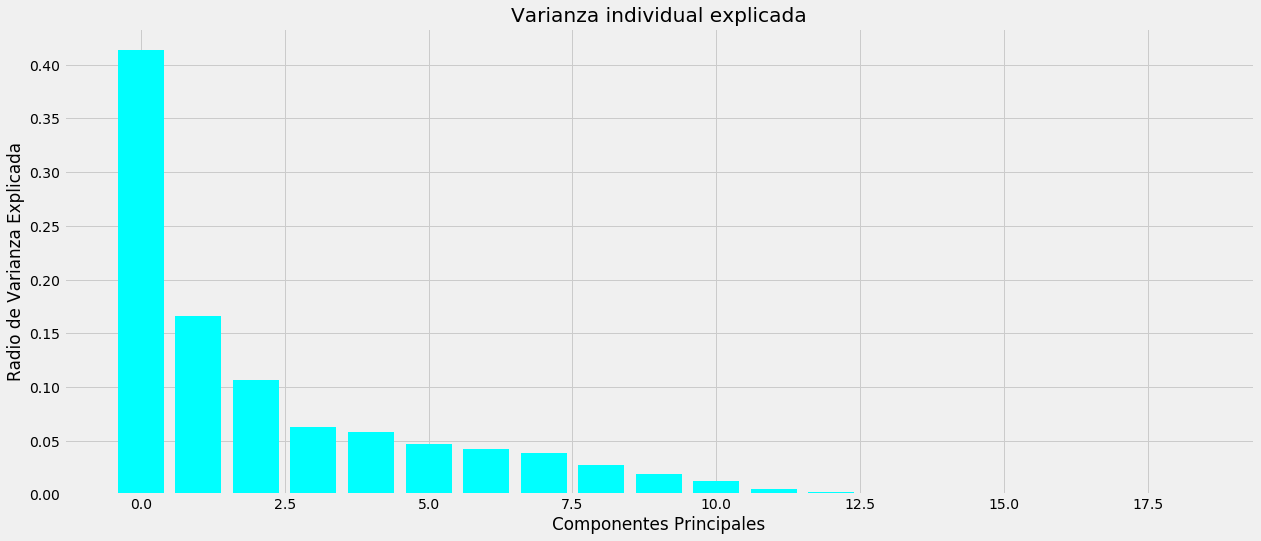

In [19]:
# Valores Propios, calculé la varianza explicada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cumVarExp = np.cumsum(varExp)

# Varianza explicada por cada Valor Propio, y la acumulada
with plt.style.context("fivethirtyeight"):
   # plt.figure(figsize=(20, 8))    
    plt.figure(figsize=(numAttri1, 8))
    plt.xlabel("Componentes Principales")
    plt.ylabel("Radio de Varianza Explicada")
    plt.title("Varianza individual explicada")
    plt.bar(range(numAttri1), varExp, align = "center", color = "cyan", ecolor = "black")


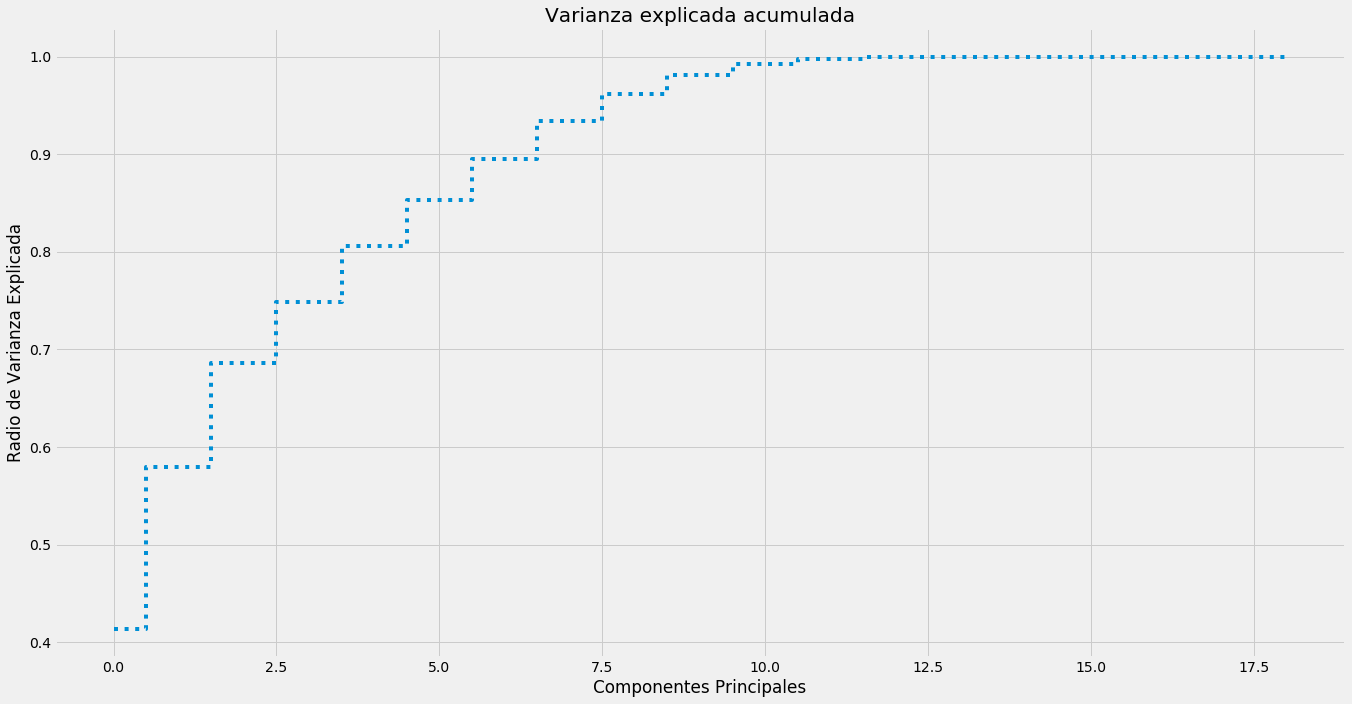

In [20]:
# Varianza explicada por cada Valor Propio, y la acumulada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cum_var_exp = np.cumsum(varExp)

# Varianza explicada por cada autovalor, y la acumulada
with plt.style.context("fivethirtyeight"):
#    plt.figure(figsize = (20, 10))   
    plt.figure(figsize = (numAttri1, 10))
    #plt.show()
    
    plt.step(range(numAttri1), cum_var_exp, where = "mid", linestyle = ":")
    plt.ylabel("Radio de Varianza Explicada")
    plt.xlabel("Componentes Principales")
    plt.title("Varianza explicada acumulada")
    plt.tight_layout()

# Datos Puros.


In [21]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1,1),
                        propiPares[1][1].reshape(numAttri1,1)
                       ))

print("Matriz PCA:\n", matriz_PCA)

Y = X_std.dot(matriz_PCA)

Matriz PCA:
 [[-0.00150401  0.08188222]
 [-0.10514798 -0.04995081]
 [ 0.          0.        ]
 [-0.00611001 -0.0082585 ]
 [ 0.05906742 -0.20819103]
 [ 0.0881603  -0.42993484]
 [ 0.04988767 -0.51205055]
 [ 0.09405115 -0.46245681]
 [ 0.0510466  -0.51275395]
 [ 0.35293314  0.06064941]
 [ 0.35036397  0.06567582]
 [ 0.36020553  0.05804977]
 [ 0.34115531  0.05803328]
 [-0.31954311 -0.0036118 ]
 [ 0.33336524  0.03436954]
 [-0.25881376 -0.04873216]
 [ 0.35559297  0.05641281]
 [-0.14639085 -0.04200018]
 [-0.20530437 -0.01791653]]


# Datos sobre un espacio de dimensionalidad 2.

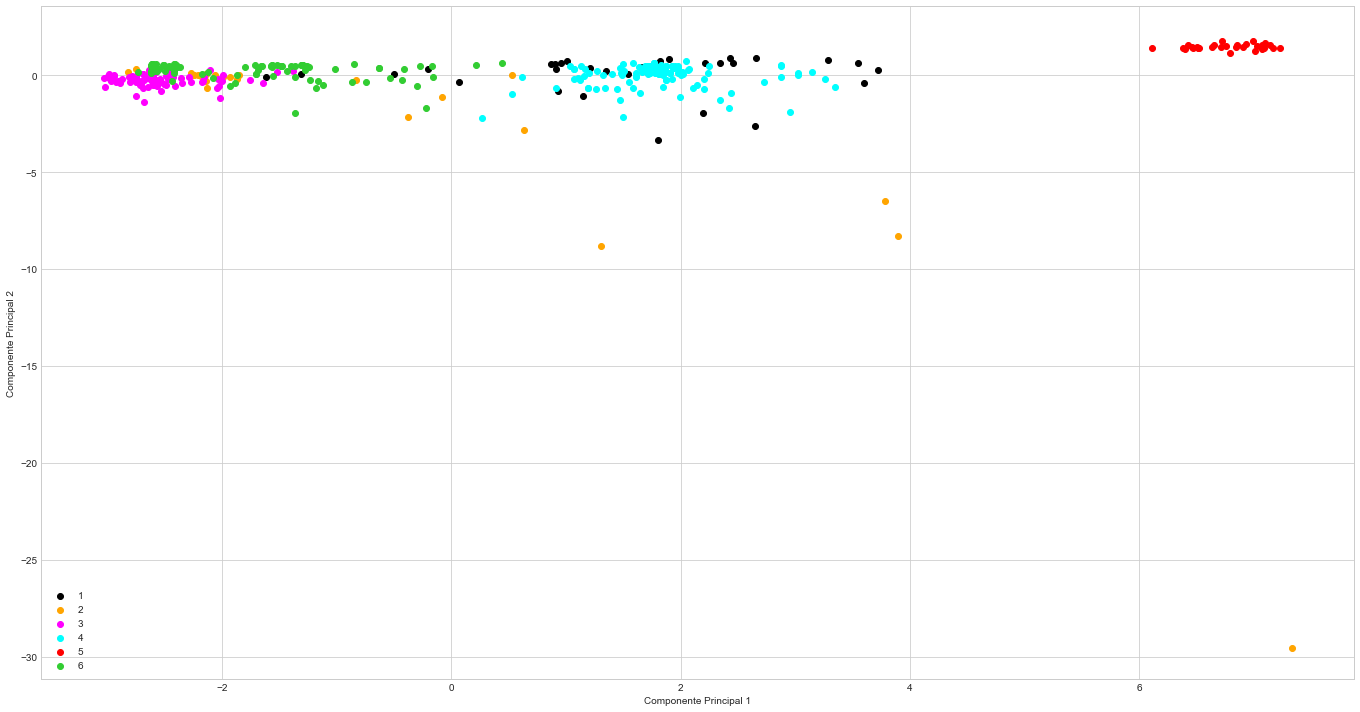

In [22]:
wrange = range(1, int(NumClas))
with plt.style.context("seaborn-whitegrid"):
#    plt.figure(figsize=(20,10))    
    plt.figure(figsize=(numAttri1,10))
    for eti, colu in zip((wrange),
                        ("black", "orange", "magenta", "cyan", "red", "limegreen", "blue", "gray", "brown", "pink")):
        plt.scatter(Y[y2 == eti, 0],
                    Y[y2 == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

# Datos Escalados

In [23]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 


matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1,1),
                        propiPares[1][1].reshape(numAttri1,1)
                       ))

Y = X_std.dot(scaler.fit_transform(matriz_PCA))
print(Y)

[[-5.57151935e+00 -3.43599194e+00]
 [-5.20257883e+00 -2.46331787e+00]
 [-5.76186576e+00 -3.67245259e+00]
 [-6.15459358e+00 -4.34120212e+00]
 [-6.11196994e+00 -4.96630379e+00]
 [-6.40959233e+00 -5.01296518e+00]
 [-1.96169810e+00 -1.79727013e+00]
 [-3.76510584e+00 -4.29447102e+00]
 [-4.21764171e+00 -4.32145893e+00]
 [-2.88613102e+00 -3.09183892e+00]
 [-6.64590348e+00 -4.58561667e+00]
 [-2.45025968e+00 -4.33141958e+00]
 [-5.07383170e+00 -2.42206900e+00]
 [-2.62340011e+00 -2.96183625e+00]
 [-3.46048724e+00 -5.30527258e+00]
 [-5.55384413e+00 -3.42923546e+00]
 [-5.54794085e+00 -3.23310373e+00]
 [-4.02837509e+00 -4.43953257e+00]
 [-5.48602714e+00 -3.51574935e+00]
 [-4.88547944e+00 -2.17108620e+00]
 [-6.45994876e+00 -5.11799326e+00]
 [-9.78757028e-01 -2.49593707e+00]
 [-5.89094798e+00 -5.25963643e+00]
 [-3.07931394e+00 -3.28874570e+00]
 [-2.30620916e+00 -2.83372240e+00]
 [-1.90917406e+00 -2.10541825e+00]
 [-6.23333567e+00 -4.76857385e+00]
 [-5.29906706e+00 -3.19447540e+00]
 [-2.42595319e+00 -2

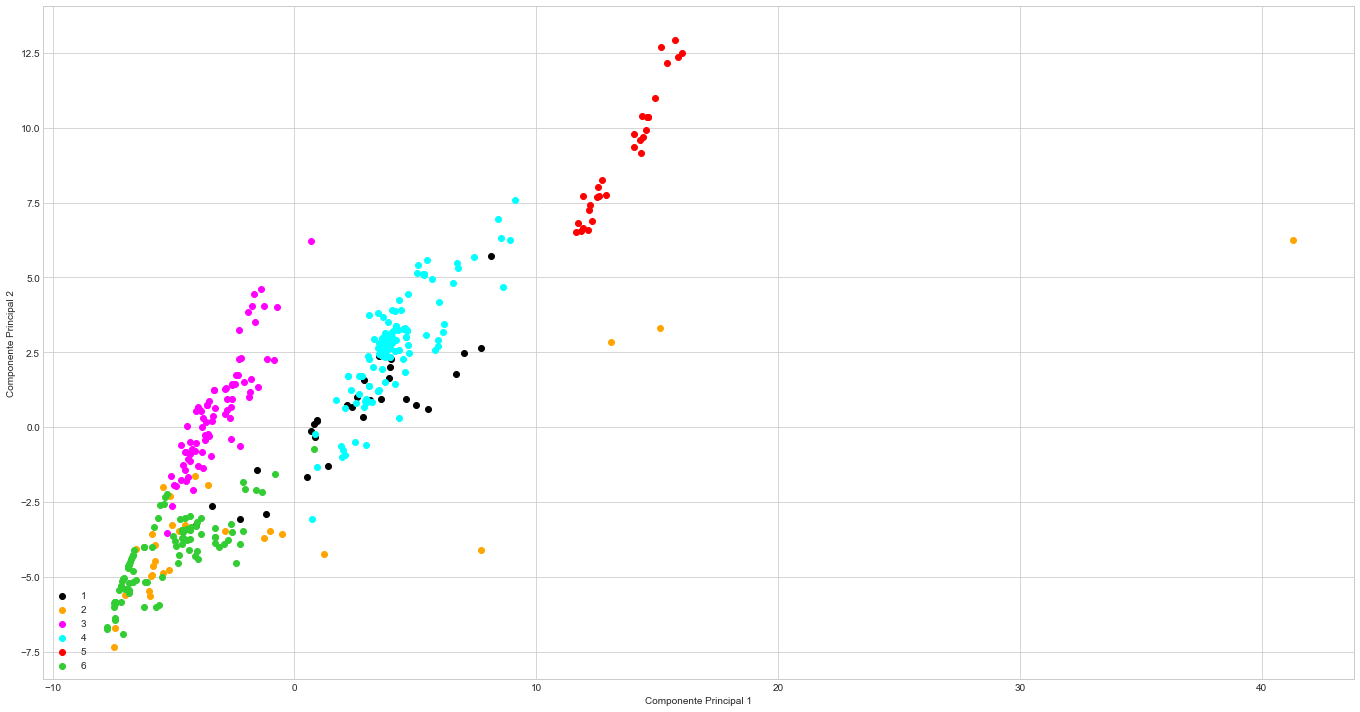

In [24]:
xrange = range(1, int(NumClas))

with plt.style.context("seaborn-whitegrid"):
#    plt.figure(figsize=(20,10))    
    plt.figure(figsize=(numAttri1,10))
    for eti, colu in zip((xrange),
                        ("black", "orange", "magenta", "cyan", "red", "limegreen", "blue", "gray", "brown", "pink")):
        plt.scatter(Y[y2 == eti, 0],
                    Y[y2 == eti, 1],
                    c = colu,
                    label = eti)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(loc = "lower left")
    plt.tight_layout()
    plt.show()

In [25]:
#FUNCIONES EXTRA

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\afb19\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


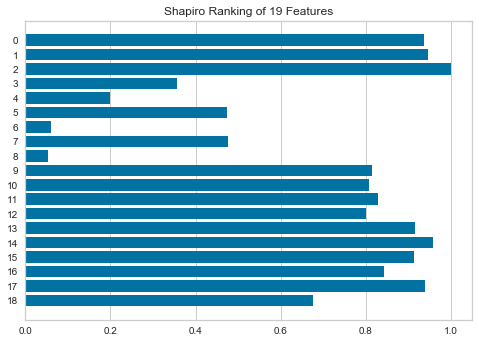

C:\Users\afb19\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\afb19\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


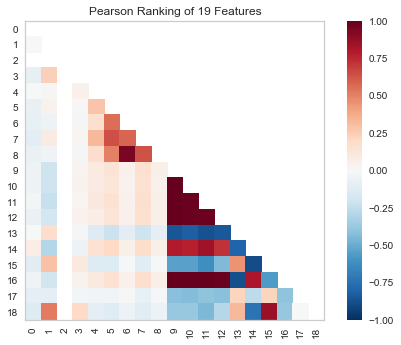

In [26]:
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

# Specify the target classes
visualizer = Rank1D(algorithm = "shapiro")

visualizer.fit(X1, y1)           # Ajustar los datos al visualizador
visualizer.transform(X1)        # Transforma los datos
visualizer.show() 

visualizer = Rank2D(algorithm = "pearson")

visualizer.fit(X1, y1)           # Ajustar los datos al visualizador
visualizer.transform(X1)        # Transforma los datos
visualizer.show() 

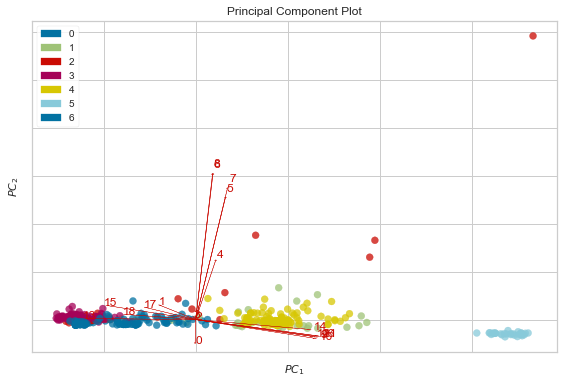

In [27]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

visualizer = PCA(scale = True, proj_features=True)
visualizer.fit_transform(X1, y1)
visualizer.show()

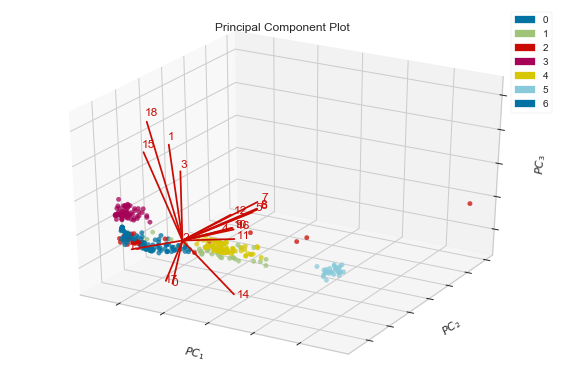

In [28]:
visualizer = PCA(scale = True, proj_features = True, projection = 3)
visualizer.fit_transform(X1, y1)
visualizer.show()

K-Medias


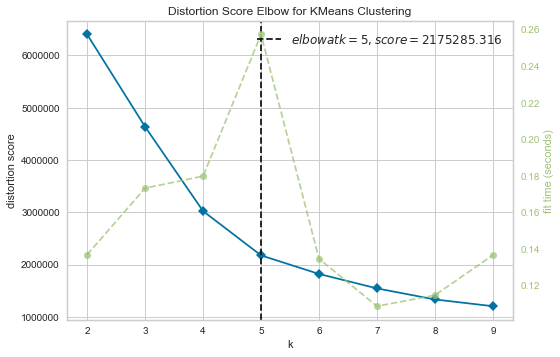

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002C61E301848>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
    
X = X1
y = y1

print("K-Medias")
kelbow_visualizer(KMeans(random_state = 4), X, k = (2,10))

Mapas de distancia intercluster


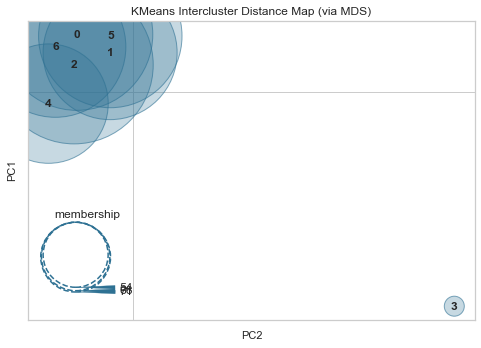

In [30]:
from yellowbrick.cluster import InterclusterDistance

# Instanciar el modelo de agrupamiento y el visualizador
model = KMeans(int(NumClas))
visualizer = InterclusterDistance(model)

print("Mapas de distancia intercluster")
visualizer.fit(X1)        # Ajustar los datos al visualizador
visualizer.show()        # Finaliza y renderiza la figura

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\afb19\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


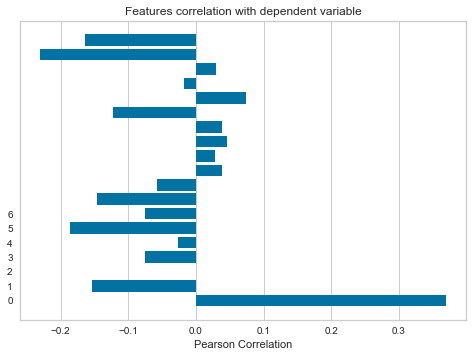

In [31]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

X = df2.iloc[:, 0:numAttri1].values
y = df2.iloc[:, numAttri1].values

# Crear una lista de los nombres de las funciones
features = range(0,int(NumClas))

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Ajustar los datos al visualizador
visualizer.show()  

# Algoritmos de Machine Learning

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
#Clasificadores con datos puros
#Separo todos los datos con las características y los resultados
X = np.array(df2.drop([numAttri1], 1))
y = np.array(df2[numAttri1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [34]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
deTr=format(X_train.shape[0])
deTe=format(X_test.shape[0])
print("Datos para Entrenamiento")
print(deTr)
print("Datos para prueba")
print(deTe)

Datos para Entrenamiento
336
Datos para prueba
84


In [35]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Datos para Entrenamiento = {} \nDatos para prueba = {}".format(X_train.shape[0], X_test.shape[0]))

Datos para Entrenamiento = 336 
Datos para prueba = 84


# K Vecinos más Cercanos

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
#Algoritmo
kvc = KNeighborsClassifier(n_neighbors = int(numclas),
                           metric = "minkowski",
                           p = 2)

In [37]:
#Lo Entreno
kvc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [38]:
#Predicción
y_pred = kvc.predict(X_test)
y_predE = kvc.predict(X_train)

In [39]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión - Prueba:")

print(matrizKV)

Matriz de Confusión - Prueba:
[[ 7  0  0  0  0  0  1]
 [ 0  4  0  1  1  0  0]
 [ 0  0  3  0  1  0  1]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0 27  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  1  1  0  0  0 20]]


In [40]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_train, y_predE)
print("Matriz de Confusión - Prueba:")

print(matrizKV)

Matriz de Confusión - Prueba:
[[16  0  2  0  0  0  4]
 [ 3 20  0  0  0  0  1]
 [ 7  1 13  0  0  0  4]
 [ 0  0  0 67  0  0  0]
 [ 0  0  0  0 92  0  0]
 [ 0  0  0  0  0 25  0]
 [ 4  1  2  0  0  0 74]]


In [41]:
df_confusion1 = pd.crosstab(y_test, y_pred)
df_confusion11 = pd.crosstab(y_train, y_predE)


In [42]:
df_confusion1 = pd.crosstab(y_test, y_pred, rownames=['Prueba'], colnames=['Predicción'], margins=True)
df_confusion11 = pd.crosstab(y_train, y_predE, rownames=['Entrenamiento'], colnames=['Predicción'], margins=True)


In [43]:
df_conf_norm = df_confusion1 / df_confusion1.sum(axis=1)
df_conf_norm11 = df_confusion11 / df_confusion1.sum(axis=1)


In [48]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(df_confusion1, title = "Matriz de Confusión", cmap=plt.cm.gray_r):
    plt.matshow(df_confusion1, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion1.columns))
    plt.xticks(tick_marks, df_confusion1.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion1.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion1.index.name)
    plt.xlabel(df_confusion1.columns.name)
    
def plot_confusion_matrix1(df_confusion11, title = "Matriz de Confusión", cmap=plt.cm.gray_r):
    plt.matshow(df_confusion11, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion11.columns))
    plt.xticks(tick_marks, df_confusion11.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion11.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion11.index.name)
    plt.xlabel(df_confusion11.columns.name)


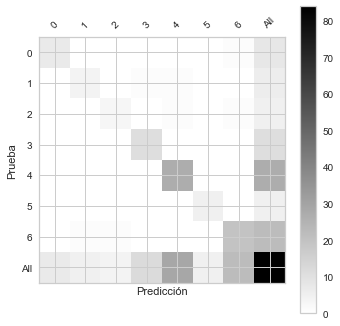

In [45]:
plot_confusion_matrix(df_confusion1)

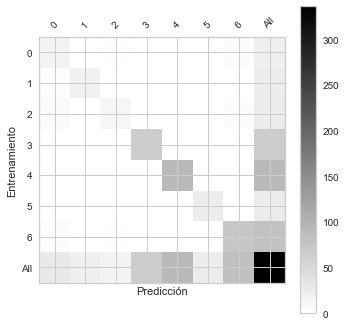

In [46]:
plot_confusion_matrix1(df_confusion11)

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


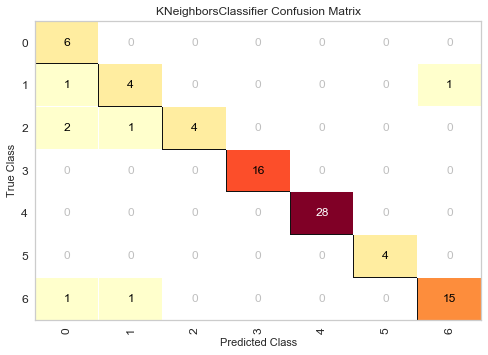

In [47]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = kvc

cm = ConfusionMatrix(model, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [49]:
#Precisión Entrenamiento
preKVCE = format(kvc.score(X_test, y_test))
print("Precisión K-Vecinos más Cercanos: ")
print(preKVCE)

Precisión K-Vecinos más Cercanos=
0.9166666666666666


In [50]:
#Precisión Prueba
preKVCP = format(kvc.score(X_test, y_test))
print("Precisión K-Vecinos más Cercanos: ")
print(preKVCP)

Precisión K-Vecinos más Cercanos=
0.9166666666666666


In [51]:
#Validación Cruzada Entrenamiento
import sklearn
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = 10, n_jobs = -1)

print("Precisiones: {}".format(precisionKVCE))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCE),
                                          np.std(precisionKVCE)))

Precisiones: [0.91176471 0.91176471 0.88235294 0.85294118 0.88235294 0.82352941
 0.93939394 0.90909091 0.90909091 0.90909091]
Precisión promedio:  0.893 +/-  0.032


In [52]:
#Validación Cruzada Prueba
precisionKVCP = sklearn.model_selection.cross_val_score(estimator=kvc,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precisionKVCP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCP),
                                          np.std(precisionKVCP)))

Precisiones: [0.69047619 0.73809524]
Precisión promedio:  0.714 +/-  0.024


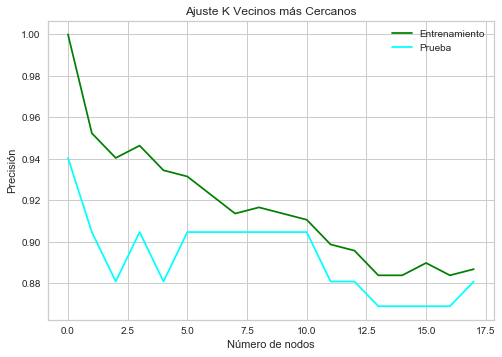

In [53]:
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()

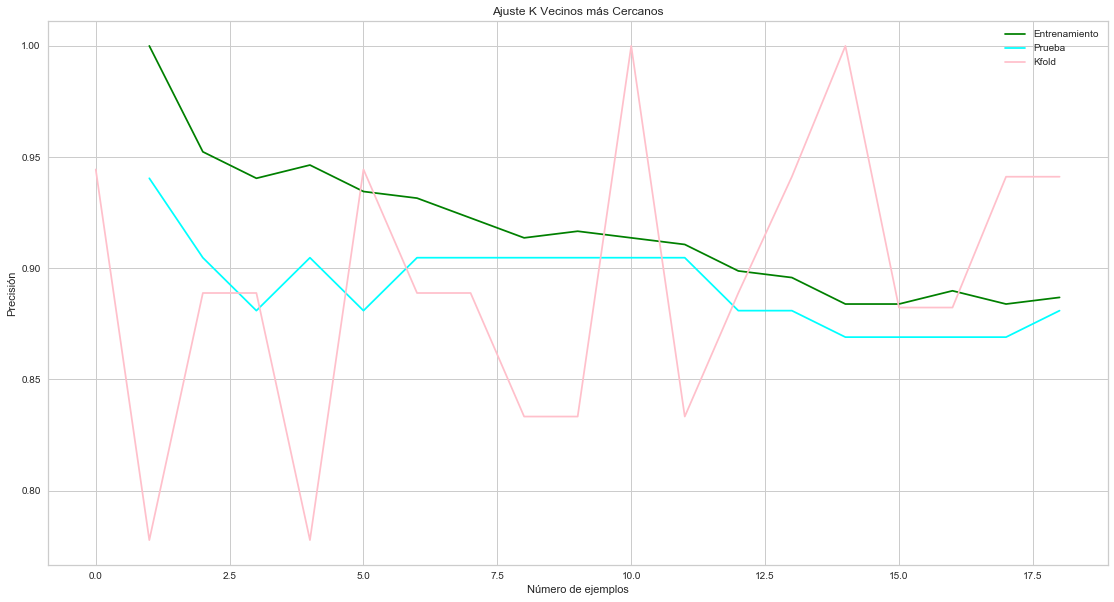

In [54]:
#Validación Cruzada Entrenamiento
import sklearn
precisionKVCE = sklearn.model_selection.cross_val_score(estimator=kvc,
                                            X=X_train, y=y_train,
#                                            cv=20, n_jobs=-1)                                                        
                                            cv=numAttri1, n_jobs=-1)
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(numAttri1, 10))
plt.plot(k_range, train_prec, color="green", label="Entrenamiento")
plt.plot(k_range, eval_prec, color="cyan", label="Prueba")
plt.plot(precisionKVCE, color="pink", label="Kfold")

plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [55]:
#Precisión del modelo - Prueba
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.67      0.73         6
           2       0.67      0.57      0.62         7
           3       0.94      1.00      0.97        16
           4       1.00      0.96      0.98        28
           5       1.00      1.00      1.00         4
           6       0.79      0.88      0.83        17

    accuracy                           0.88        84
   macro avg       0.84      0.82      0.83        84
weighted avg       0.88      0.88      0.88        84



In [56]:
#Precisión del modelo - Entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
pred = knn.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        24
           1       1.00      0.75      0.86        24
           2       0.82      0.39      0.53        23
           3       0.98      0.97      0.98        62
           4       0.95      1.00      0.97        91
           5       1.00      1.00      1.00        26
           6       0.82      0.93      0.87        86

    accuracy                           0.89       336
   macro avg       0.87      0.80      0.82       336
weighted avg       0.89      0.89      0.88       336



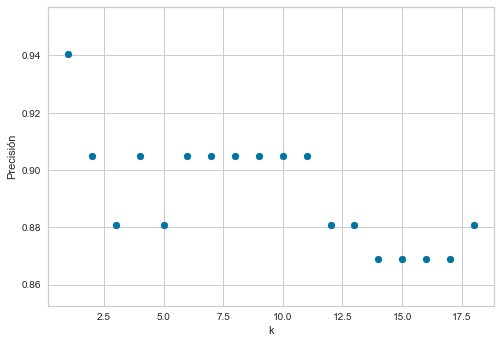

In [57]:
#Elegir el mejor valor de k
k_range = range(1, numAttri1)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel("k")
plt.ylabel("Precisión")
plt.scatter(k_range, scores)

In [58]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import learning_curve, GridSearchCV

train_sizes, train_scores, test_scores = learning_curve(estimator = kvc,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = 10,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

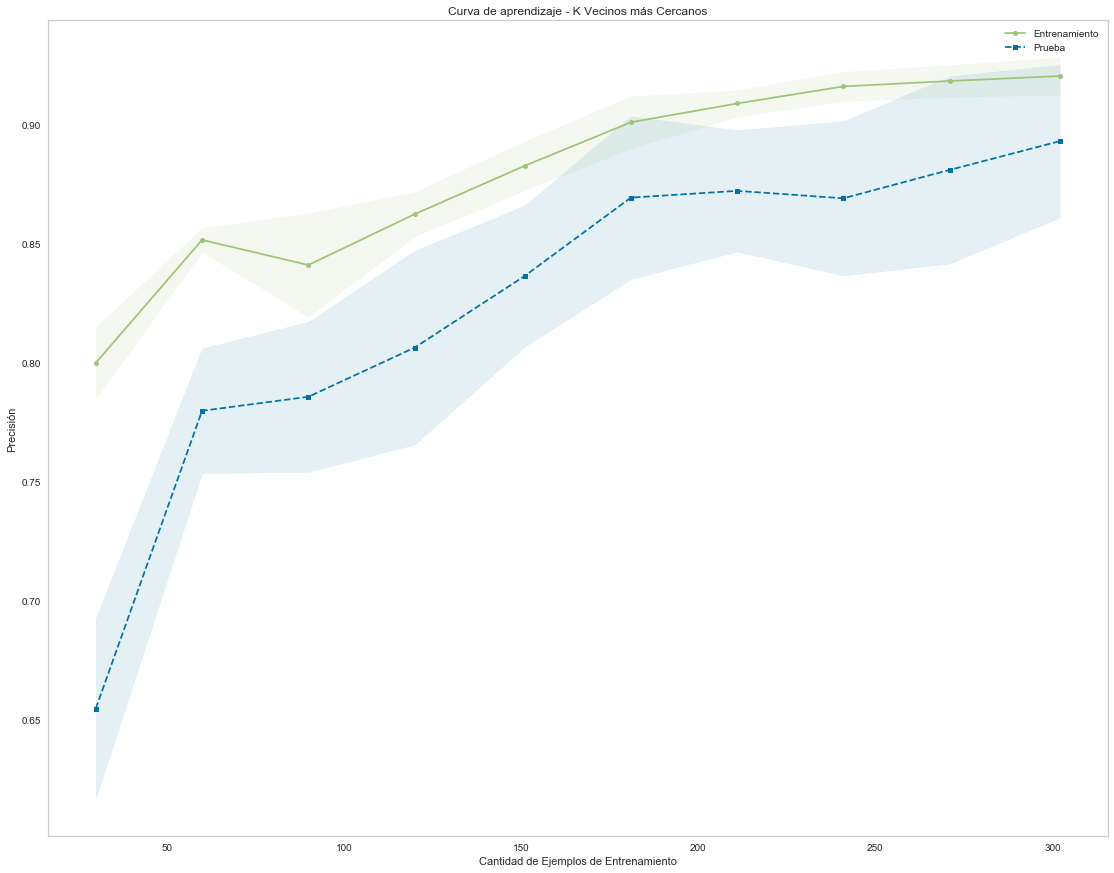

In [60]:
# Graficando las curvas
#plt.subplots(figsize=(20, 15))
plt.subplots(figsize=(numAttri1, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - K Vecinos más Cercanos")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

# Navie Bayes

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
gnb = GaussianNB()

In [63]:
#Lo Entreno
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
#Predicción
y_pred2 = gnb.predict(X_test)
y_pred22 = gnb.predict(X_train)

In [65]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión - Prueba:")
print(matrizGNB)


Matriz de Confusión - Prueba:
[[ 4  3  0  0  0  0  0]
 [ 0  5  1  0  1  0  0]
 [ 1  1  3  0  0  0  3]
 [ 0  0  0 10  0  0  0]
 [ 0  1  0  0 26  0  0]
 [ 0  0  0  0  0  6  0]
 [ 2  1  1  0  0  0 15]]


In [66]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_train, y_pred22)
print("Matriz de Confusión - Entrenamiento:")
print(matrizGNB)

Matriz de Confusión - Entrenamiento:
[[23  0  0  0  0  0  0]
 [ 1 22  0  0  0  0  0]
 [ 0  0  6  0  0  0 16]
 [ 0  0  0 67  0  0  1]
 [ 0  8  2  0 82  0  0]
 [ 0  0  0  0  0 24  0]
 [ 5  3  4  0  0  0 72]]


In [67]:
df_confusion2 = pd.crosstab(y_test, y_pred2)
df_confusion22 = pd.crosstab(y_train, y_pred22)

In [68]:
df_confusion2 = pd.crosstab(y_test, y_pred2, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion22 = pd.crosstab(y_train, y_pred22, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)


In [69]:
df_conf_norm2 = df_confusion2 / df_confusion2.sum(axis = 1)
df_conf_norm22 = df_confusion22 / df_confusion22.sum(axis = 1)

In [70]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion2, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion2, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion2.columns))
    plt.xticks(tick_marks, df_confusion2.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion2.index)
    plt.ylabel(df_confusion2.index.name)
    plt.xlabel(df_confusion2.columns.name)

def plot_confusion_matrix2(df_confusion22, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion22, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion22.columns))
    plt.xticks(tick_marks, df_confusion22.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion22.index)
    plt.ylabel(df_confusion22.index.name)
    plt.xlabel(df_confusion22.columns.name)

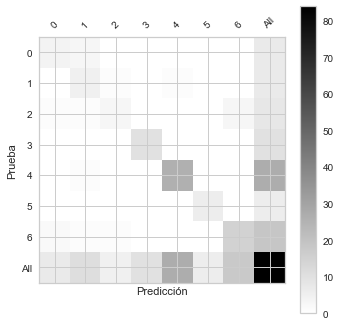

In [71]:
plot_confusion_matrix(df_confusion2)

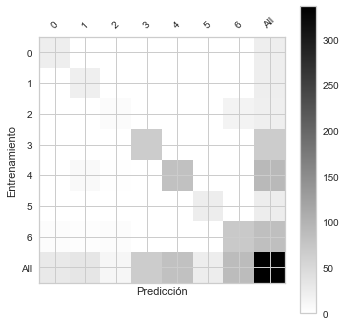

In [72]:
plot_confusion_matrix2(df_confusion22)

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


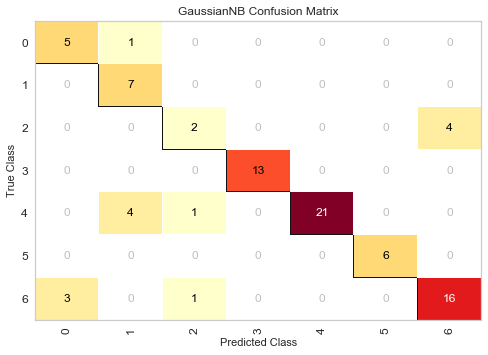

In [73]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

model = gnb

cm = ConfusionMatrix(model, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [74]:
#Precisión Entrenamiento
preGNBE = format(gnb.score(X_train, y_train))
print("Precisión Navie Bayes=")
print(preGNBE)

Precisión Navie Bayes=
0.8779761904761905


In [75]:
#Precisión Prueba
preGNBP = format(gnb.score(X_test, y_test))
print("Precisión Navie Bayes=")
print(preGNBP)

Precisión Navie Bayes=
0.8333333333333334


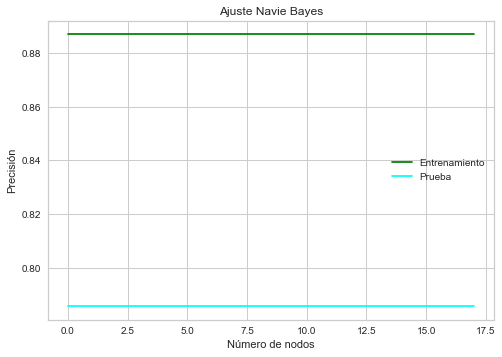

In [76]:
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    gnb.fit(X_train, y_train)
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
# Resultados.
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste Navie Bayes")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()

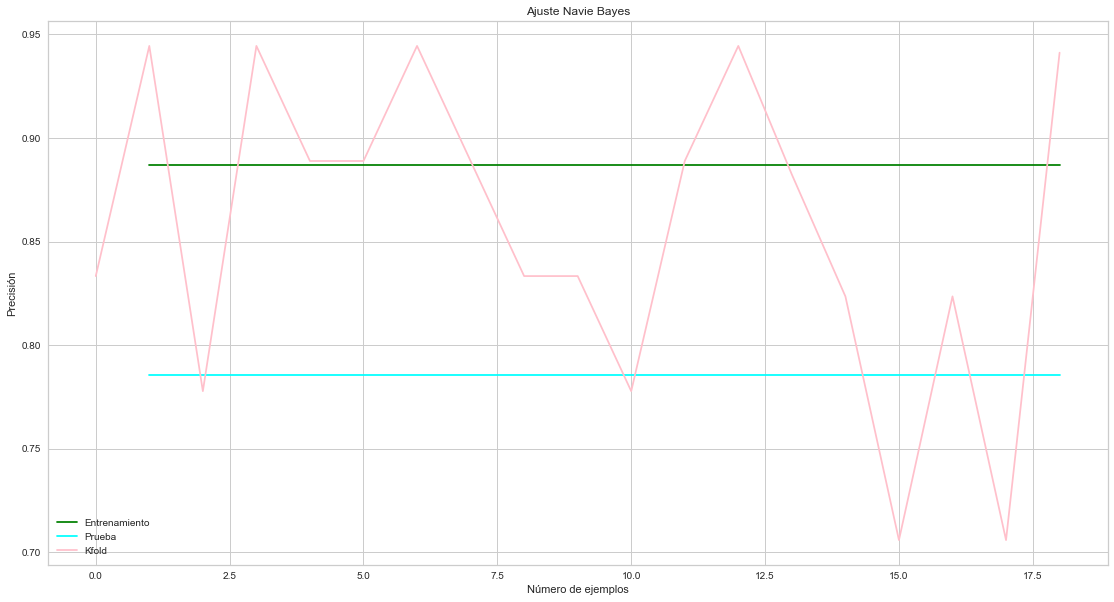

In [77]:
#Validación Cruzada Entrenamiento
import sklearn
precisionGNBE = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = numAttri1, n_jobs = -1)                                                        
#                                            cv=20, n_jobs=-1)

# Grafico de ajuste de Navie Bayes
k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    gnb.fit(X_train, y_train)
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    #precision((X_test, y_test))
# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionGNBE, color = "pink", label = "Kfold")

plt.title("Ajuste Navie Bayes")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [78]:
#Precisión del modelo - Prueba
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pred = gnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.40      0.57      0.47         7
           2       0.33      0.33      0.33         6
           3       1.00      0.92      0.96        13
           4       1.00      0.77      0.87        26
           5       1.00      1.00      1.00         6
           6       0.77      0.85      0.81        20

    accuracy                           0.79        84
   macro avg       0.73      0.75      0.74        84
weighted avg       0.82      0.79      0.80        84



In [79]:
#Precisión del modelo - Entrenamiento
pred = gnb.predict(X_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.61      0.87      0.71        23
           2       0.70      0.29      0.41        24
           3       1.00      0.98      0.99        65
           4       1.00      0.92      0.96        93
           5       1.00      1.00      1.00        24
           6       0.81      0.89      0.85        83

    accuracy                           0.89       336
   macro avg       0.85      0.85      0.83       336
weighted avg       0.89      0.89      0.88       336



In [80]:
#Validación Cruzada Entrenamiento
import sklearn
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = 10, n_jobs = -1)

print("Precisiones: {}".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.85294118 0.82352941 0.88235294 0.91176471 0.79411765 0.85294118
 0.87878788 0.84848485 0.81818182 0.84848485]
Precisión promedio:  0.851 +/-  0.032


In [81]:
#Validación Cruzada Prueba
import sklearn
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.73809524 0.71428571]
Precisión promedio:  0.726 +/-  0.012


In [82]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import learning_curve, GridSearchCV

train_sizes, train_scores, test_scores = learning_curve(estimator = gnb,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = 10,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

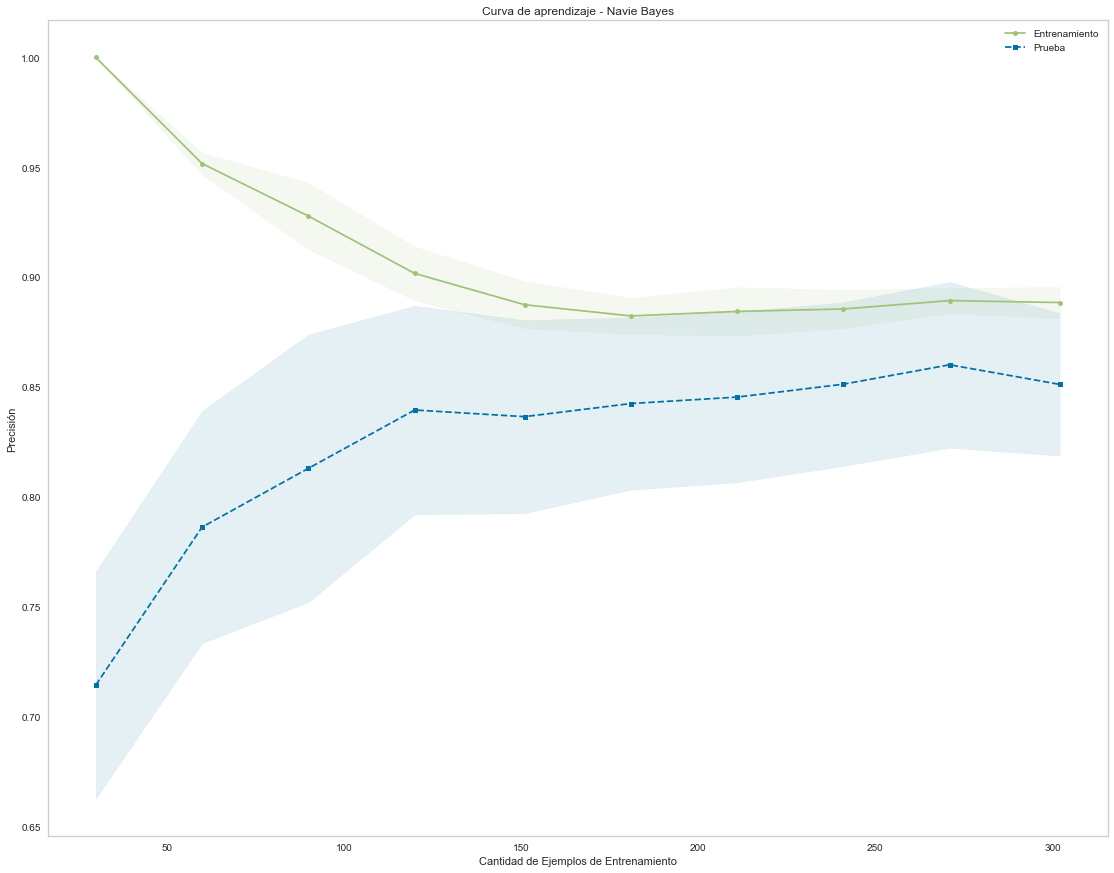

In [83]:
# Graficando las curvas
#plt.subplots(figsize=(20, 15))
plt.subplots(figsize = (numAttri1, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - Navie Bayes")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

# Árboles de Decisión Clasificación

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

#Separo los datos de "train" en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [85]:
ad = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)#Profundidad

In [86]:
#Lo Entreno
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
# Precisión del modelo en datos de entrenamiento(EJEMPLO).
print("Precisión entranamiento: {0: .2f}".format(
        ad.score(X_train, y_train)))

Precisión entranamiento:  0.97


In [88]:
#Predicción
y_pred3 = ad.predict(X_test)
y_pred33 = ad.predict(X_train)

In [89]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizAD = confusion_matrix(y_test, y_pred3)
print("Matriz de Confusión - Prueba:")
print(matrizAD)

Matriz de Confusión - Prueba:
[[ 5  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  2]
 [ 0  1  7  0  0  0  1]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  1  0  0  0 18]]


In [90]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó 
matrizAD = confusion_matrix(y_train, y_pred33)
print("Matriz de Confusión - Entrenamiento:")
print(matrizAD)

Matriz de Confusión - Entrenamiento:
[[25  0  0  0  0  0  0]
 [ 1 18  0  0  0  0  2]
 [ 1  0 19  0  0  0  1]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 95  0  0]
 [ 0  0  0  0  0 26  0]
 [ 0  0  4  0  0  0 80]]


In [91]:
df_confusion3 = pd.crosstab(y_test, y_pred3)
df_confusion33 = pd.crosstab(y_train, y_pred33)

In [92]:
df_confusion3 = pd.crosstab(y_test, y_pred3, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion33 = pd.crosstab(y_train, y_pred33, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)


In [93]:
df_conf_norm3 = df_confusion3 / df_confusion3.sum(axis = 1)
df_conf_norm33 = df_confusion33 / df_confusion33.sum(axis = 1)


In [94]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion3, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion3, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion3.columns))
    plt.xticks(tick_marks, df_confusion3.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion3.index)
    plt.ylabel(df_confusion3.index.name)
    plt.xlabel(df_confusion3.columns.name)
    
def plot_confusion_matrix3(df_confusion33, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion33, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion33.columns))
    plt.xticks(tick_marks, df_confusion33.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion33.index)
    plt.ylabel(df_confusion33.index.name)
    plt.xlabel(df_confusion33.columns.name)


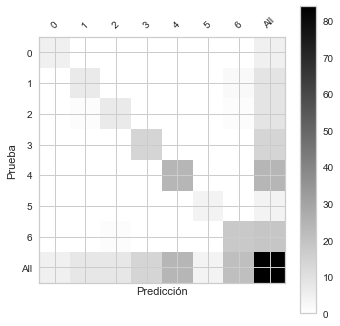

In [95]:
plot_confusion_matrix(df_confusion3)

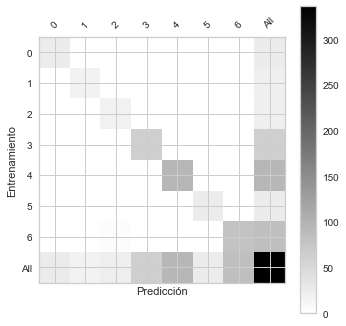

In [96]:
plot_confusion_matrix3(df_confusion33)

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


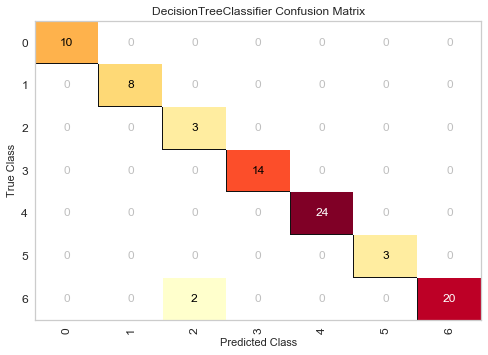

In [97]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
#EN VERIFICACIÓN

X = X1
y = y1
classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = ad

cm = ConfusionMatrix(model, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()

In [438]:
#Precisión Entrenamiento
#preADE = precision_score(y_train, y_pred, average="macro")#Ponderado
#print("Precisión Árbol de Decisión:")
#print(preAD)

In [98]:
#Precisión Prueba
preADP = precision_score(y_test, y_pred, average = "weighted")#Ponderado
print("Precisión Árbol de Decisión:")
print(preADP)

Precisión Árbol de Decisión:
0.11480569239189929


In [99]:
#Validación Cruzada Entrenamiento
import sklearn
precisionADE = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = 10, n_jobs = -1)

print("Precisiones: {}".format(precisionADE))
print("Precision promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADE),
                                          np.std(precisionADE)))

Precisiones: [0.85294118 0.97058824 0.94117647 0.94117647 0.91176471 0.94117647
 0.93939394 0.84848485 0.84848485 0.96969697]
Precision promedio:  0.916 +/-  0.046


In [100]:
#Validación Cruzada Prueba
import sklearn
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}".format(precisionADP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADP),
                                          np.std(precisionADP)))

Precisiones: [0.85714286 0.92857143]
Precisión promedio:  0.893 +/-  0.036


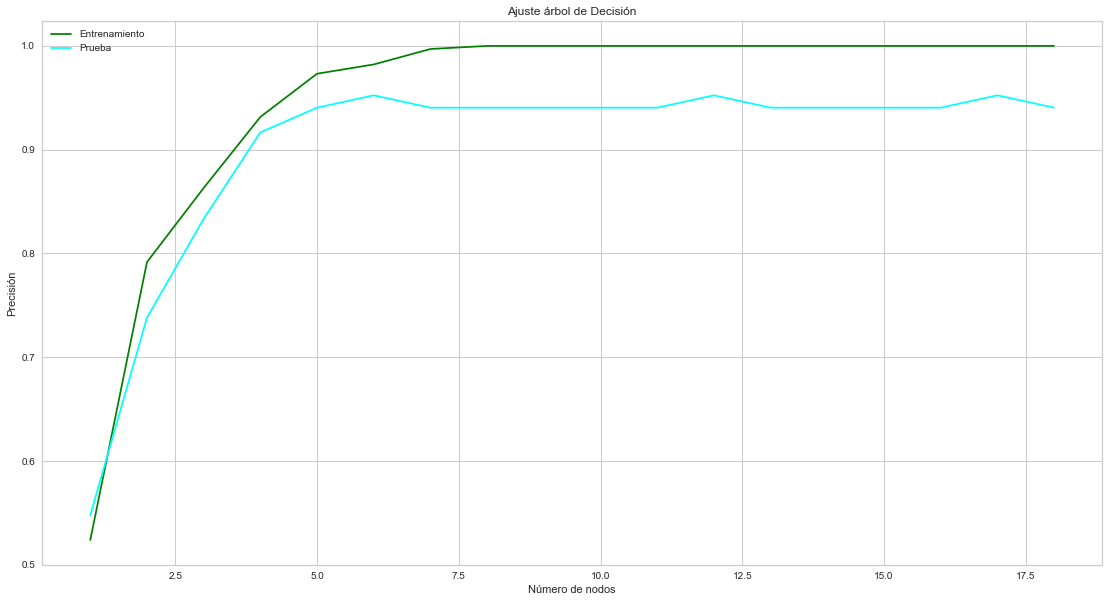

In [101]:
# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion = "entropy", max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de nodos")
plt.show()

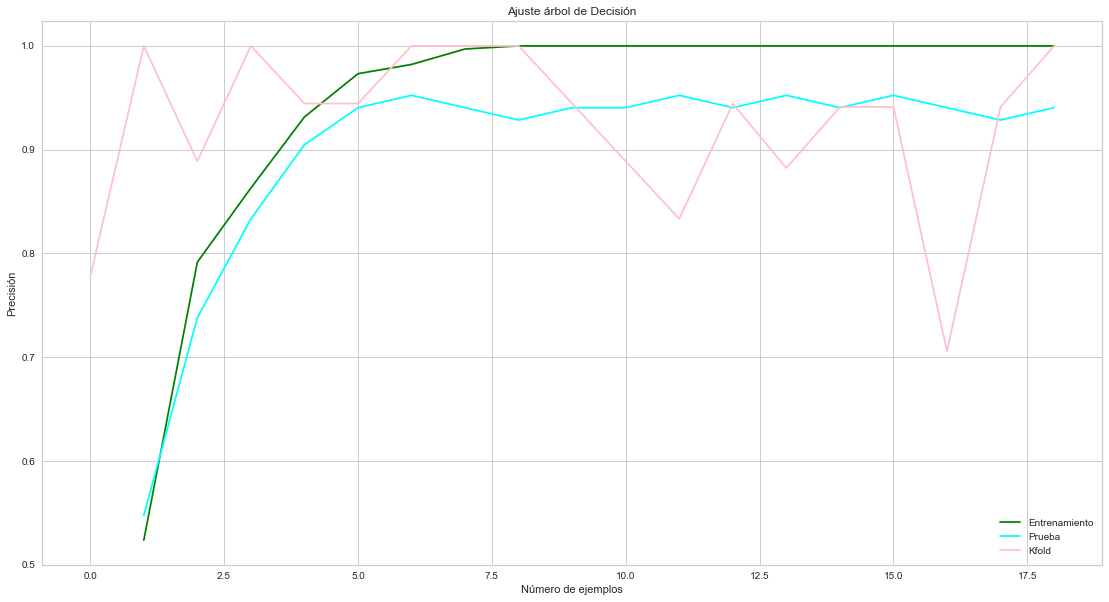

In [102]:
#Validación Cruzada Entrenamiento
import sklearn
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = numAttri1, n_jobs = -1)

# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion  = "entropy", max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
#fig, ax = plt.subplots(figsize=(20, 10))
fig, ax = plt.subplots(figsize = (numAttri1, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionADP, color = "pink", label = "Kfold")

plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()

In [103]:
#Precisión del modelo - Prueba
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
ad.fit(X_test, y_test)

pred = ad.predict(X_test)
print("Prueba")
print(classification_report(y_test, pred))

Prueba
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00        22

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [104]:
#Precisión del modelo - Entrenamiento
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
ad = DecisionTreeClassifier(criterion = "entropy")
ad.fit(X_train, y_train)

pred = ad.predict(X_train)
print("Entrenamiento")
print(classification_report(y_train, pred))

Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        95
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        81

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



In [105]:
ad.tree_.max_depth


8

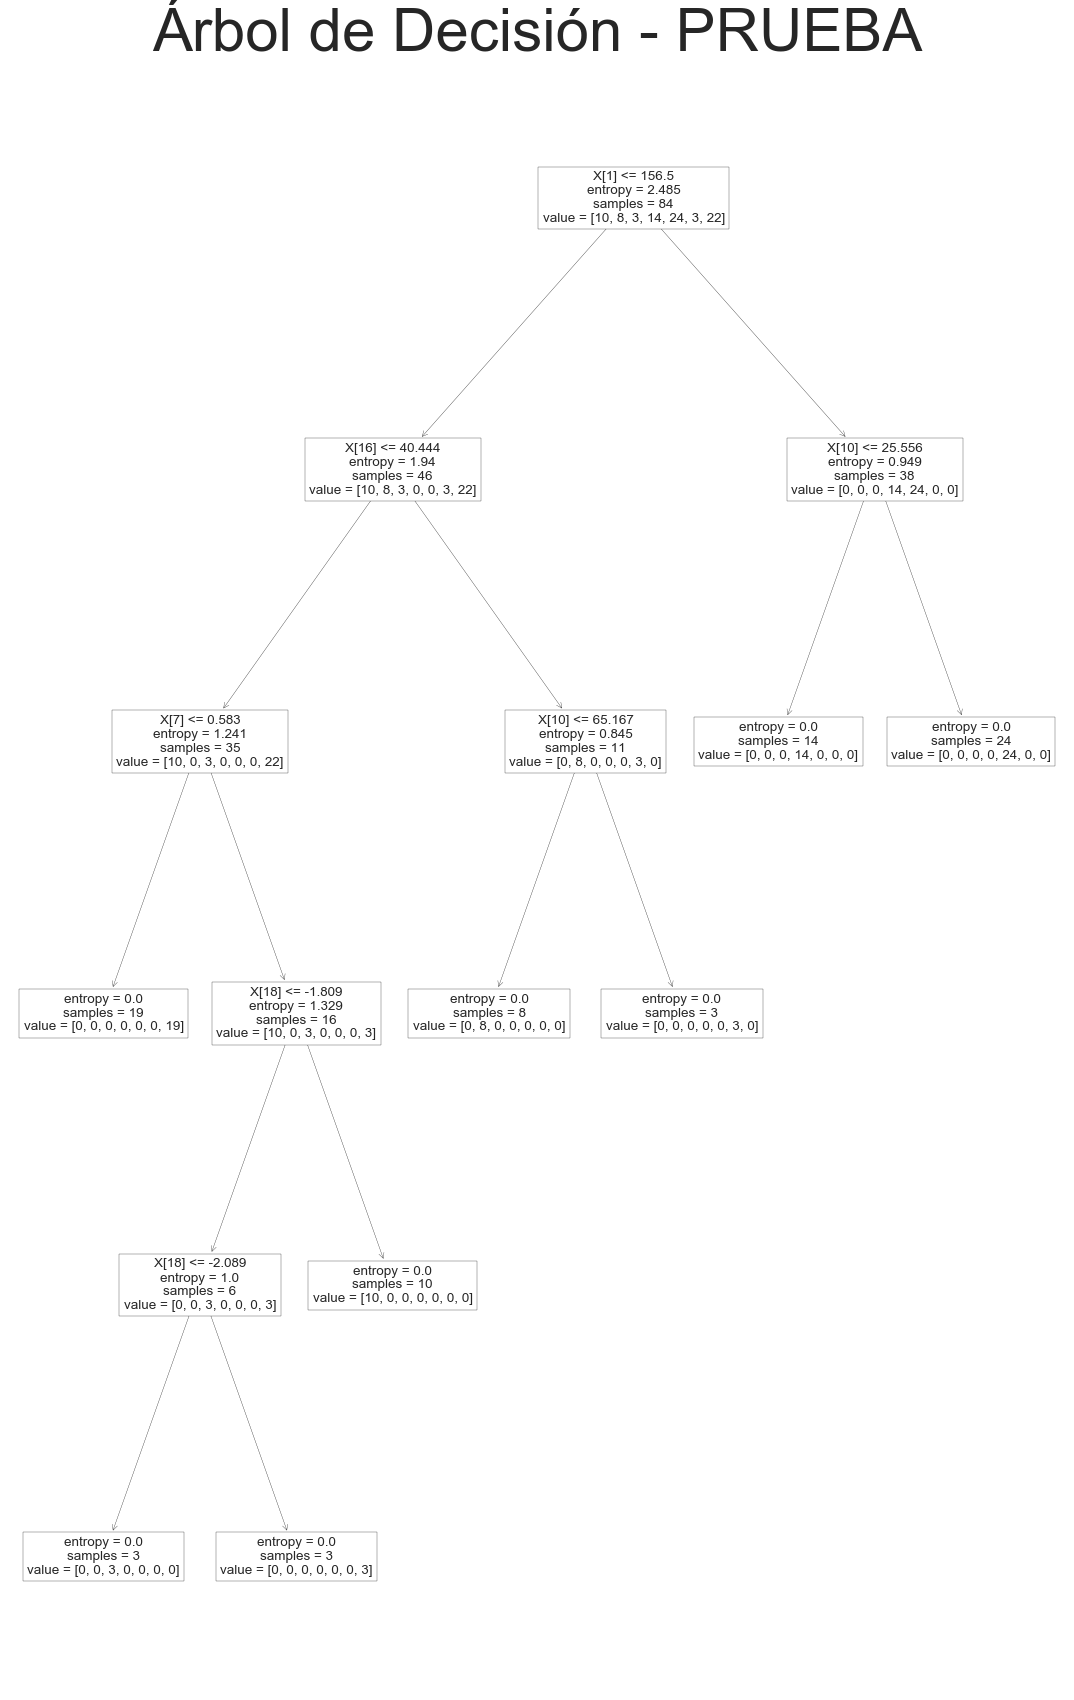

In [106]:
from sklearn import tree
import matplotlib.pyplot as plt
arbolito = tree.DecisionTreeClassifier()

fig, ax = plt.subplots(figsize = (numAttri1, 30))
#fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_test, y_test)) 
plt.title("Árbol de Decisión - PRUEBA", fontsize=60)
plt.show()

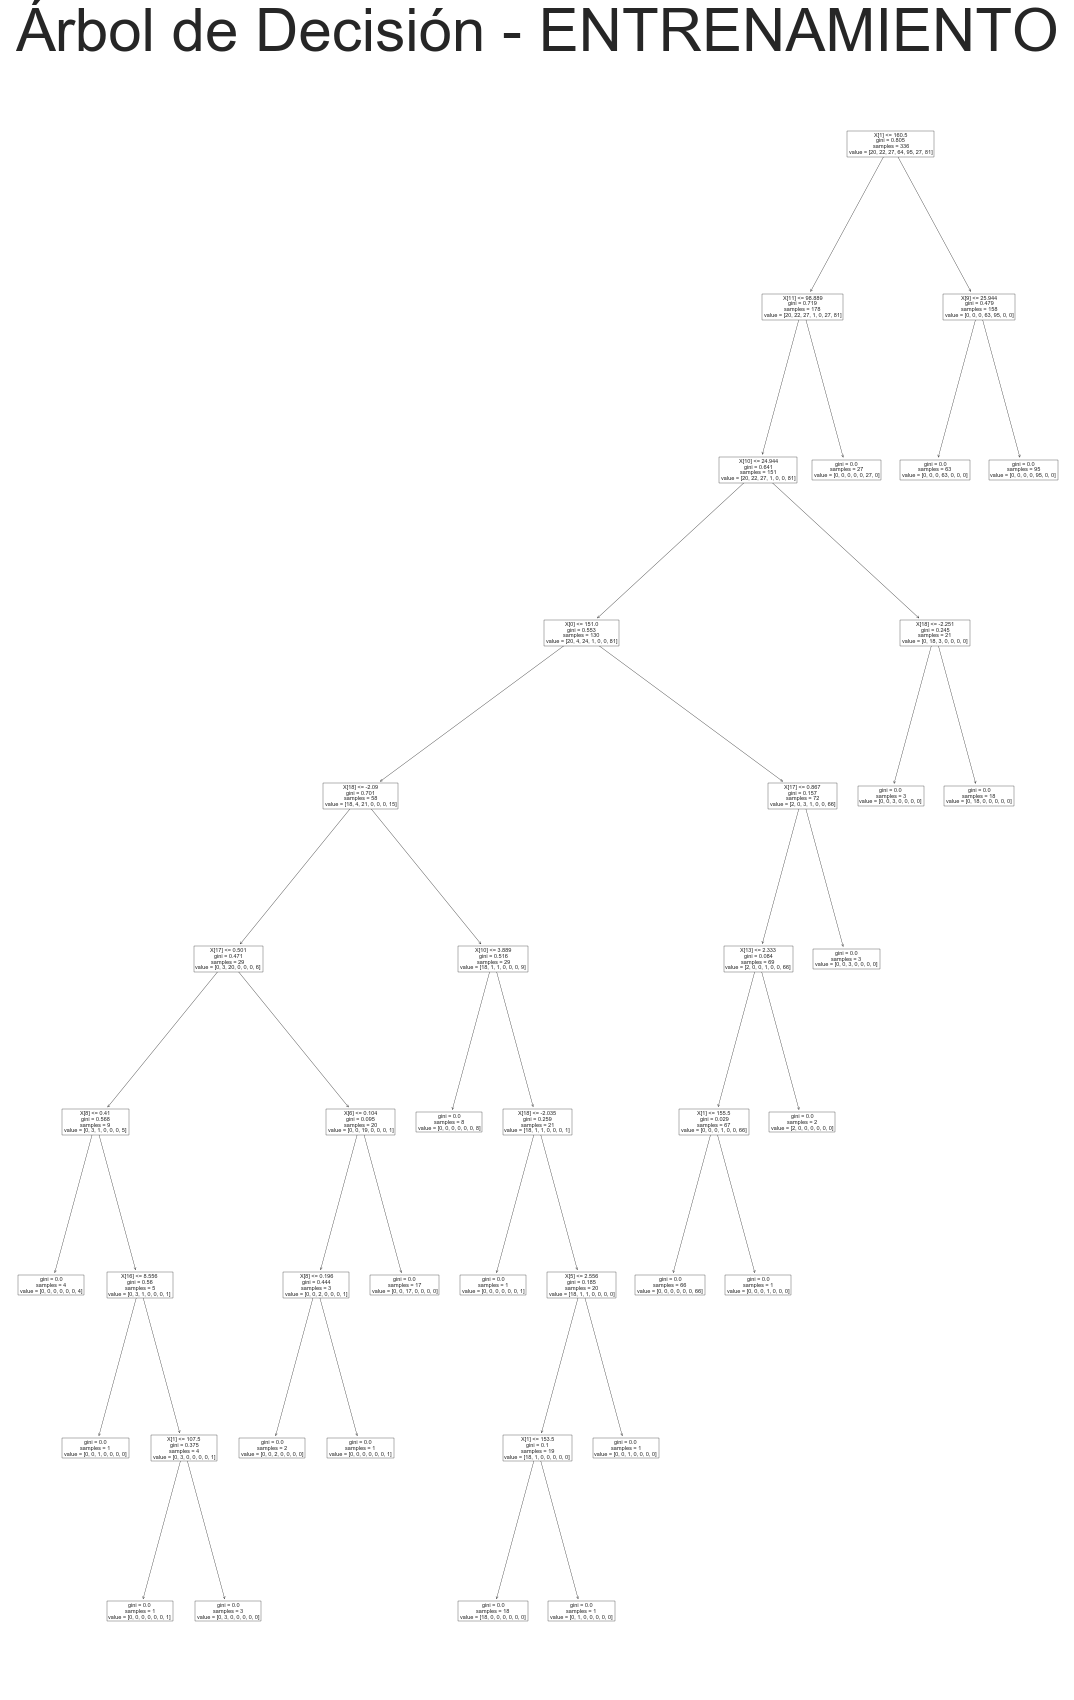

In [107]:
import matplotlib.pyplot as plt
arbolito = tree.DecisionTreeClassifier()

fig, ax = plt.subplots(figsize = (numAttri1, 30))
#fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(arbolito.fit(X_train, y_train)) 
plt.title("Árbol de Decisión - ENTRENAMIENTO", fontsize = 60)
plt.show()


In [108]:
# Ejemplo Curvas de aprendizaje
from sklearn.model_selection import learning_curve, GridSearchCV

train_sizes, train_scores, test_scores = learning_curve(estimator = ad,
                        X = X_train, y = y_train, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = 10,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

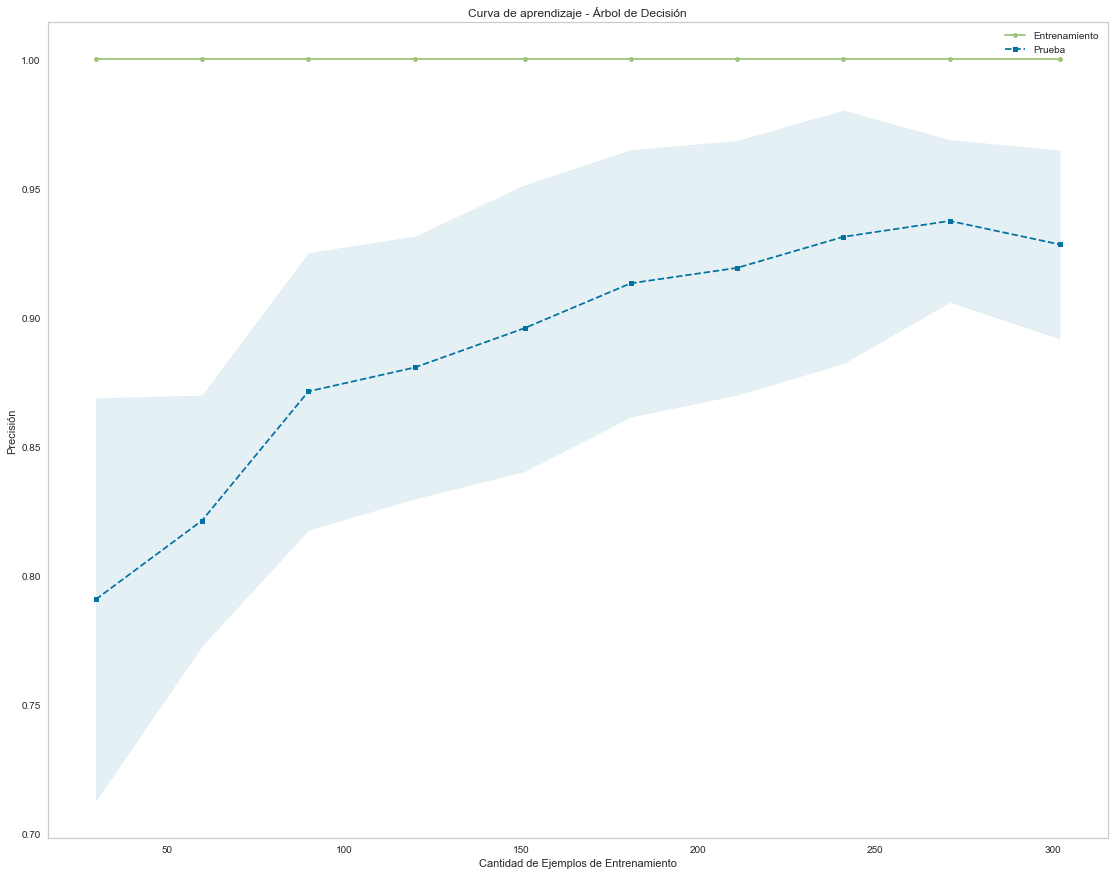

In [109]:
# Graficando las curvas
plt.subplots(figsize = (numAttri1, 15))
#plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color='g')
plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")
plt.grid()

plt.title("Curva de aprendizaje - Árbol de Decisión")
plt.legend(loc = "best")
plt.xlabel("Cantidad de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()

C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


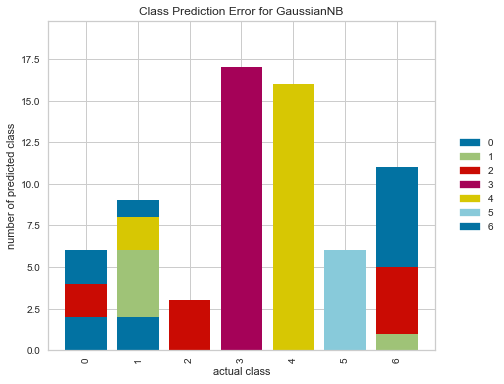

In [110]:
import yellowbrick
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassPredictionError

# Crear conjunto de datos de clasificación

X = X_train
y = y_train

classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    GaussianNB(), classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()


C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


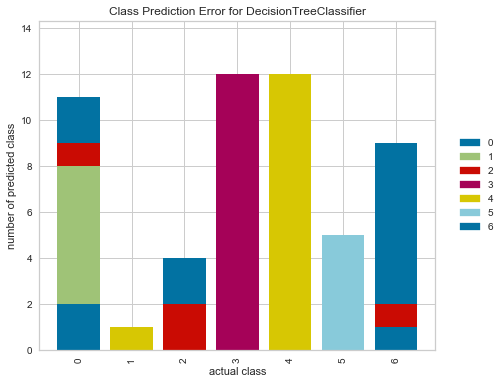

In [111]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassPredictionError


# Crear conjunto de datos de clasificación

X = X_train
y = y_train

classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    DecisionTreeClassifier(max_depth=4), classes=classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()


C:\Users\afb19\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


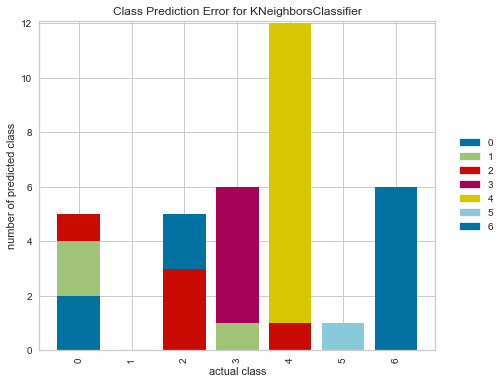

In [113]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassPredictionError

# Crear conjunto de datos de clasificación

X = X_train
y = y_train

classes = range(0, int(NumClas))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    KNeighborsClassifier(n_neighbors = 7), classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
 

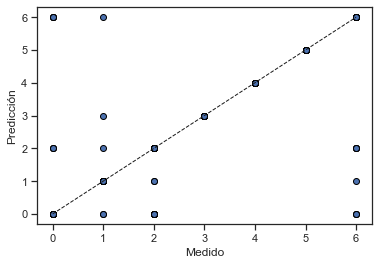

In [27]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

X2 = df2.iloc[:, 0:numAttri1].values
y2 = df2.iloc[:, numAttri1].values

lr = KNeighborsClassifier(n_neighbors = 10)
X =df2.iloc[:, 0:19].values
y = df2.iloc[:, 19].values

# cross_val_predict devuelve una matriz del mismo tamaño que `y` donde cada entrada
# es una predicción obtenida por validación cruzada:
predicted = cross_val_predict(lr, X, y, cv = 6)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 2)
ax.set_xlabel('Medido')
ax.set_ylabel('Predicción')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
#Clasificador 1
clas1 = kvc
#Clasificador 2
clas2 = gnb
#Clasificador 3
clas3 = tree.DecisionTreeClassifier()

print("Eiquetas de clase o probabilidades para X para cada clasificador.")
eclf1 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], voting='hard')
eclf1 = eclf1.fit(X_test, y_test)
print("K Vecinos más Cercanos")
print(eclf1.predict(X_test))
print(eclf1.transform(X_test).shape)

print("\n")

#np.array_equal(eclf1.named_estimators_.wmc.predict(X_test), eclf1.named_estimators_['wmc'].predict(X_test))

eclf2 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], flatten_transform=True)
eclf2 = eclf2.fit(X_test, y_test)
print("Avie Bayes")
print(eclf2.predict(X_test))
print(eclf2.transform(X_test).shape)

print("\n")

eclf3 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], voting='soft')
eclf3 = eclf3.fit(X_test, y_test)
print("Árbol de Desición")
print(eclf3.predict(X_test))

print(eclf3.transform(X_test).shape)


In [ ]:
import matplotlib.pyplot as plt
#Clasificador 1
clas1 = kvc
#Clasificador 2
clas2 = gnb
#Clasificador 3
clas3 = tree.DecisionTreeClassifier()

print("Eiquetas de clase o probabilidades para X para cada clasificador.")
eclf1 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print("K Vecinos más Cercanos")
print(eclf1.predict(X_train))
print(eclf1.transform(X_train).shape)

print("\n")

#np.array_equal(eclf1.named_estimators_.wmc.predict(X_test), eclf1.named_estimators_['wmc'].predict(X_test))

eclf2 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], flatten_transform=True)
eclf2 = eclf2.fit(X_train, y_train)
print("Avie Bayes")
print(eclf2.predict(X_train))
print(eclf2.transform(X_train).shape)

print("\n")

eclf3 = VotingClassifier(estimators=[('vmc', clf1), ('nb', clf2), ('ad', clf3)], voting='soft')
eclf3 = eclf3.fit(X_train, y_train)
print("Árbol de Desición")
print(eclf3.predict(X_train))

print(eclf3.transform(X_train).shape)


In [58]:
# La Regresión Lineal usa el método de descenso gradiente 

# Nuestra data
X =df2.iloc[:, 0:19].values
y = df2.iloc[:, 19].values

regr = KNeighborsClassifier(n_neighbors = 7)
regr.fit(X, y)

# Salidas Argumentadas
plt.xlabel('Age')
plt.ylabel('Blood pressure')

plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue')

plt.show()
plt.gcf().clear()

ValueError: Unknown label type: 'continuous-multioutput'